***Let's explore how to visualise data in python!***

In [5]:
%pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'sklearn'

# Introduction to some basic plots for visualizing data

Loading a dataset:

In [2]:
from sklearn.datasets import load_iris

ModuleNotFoundError: No module named 'sklearn'

In [3]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Understanding the given data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#Summary statistics to understand range and distribution of given dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
#Adding target variable to the dataframe
data['target'] = iris.target

***Introduction to plots:  Histograms***

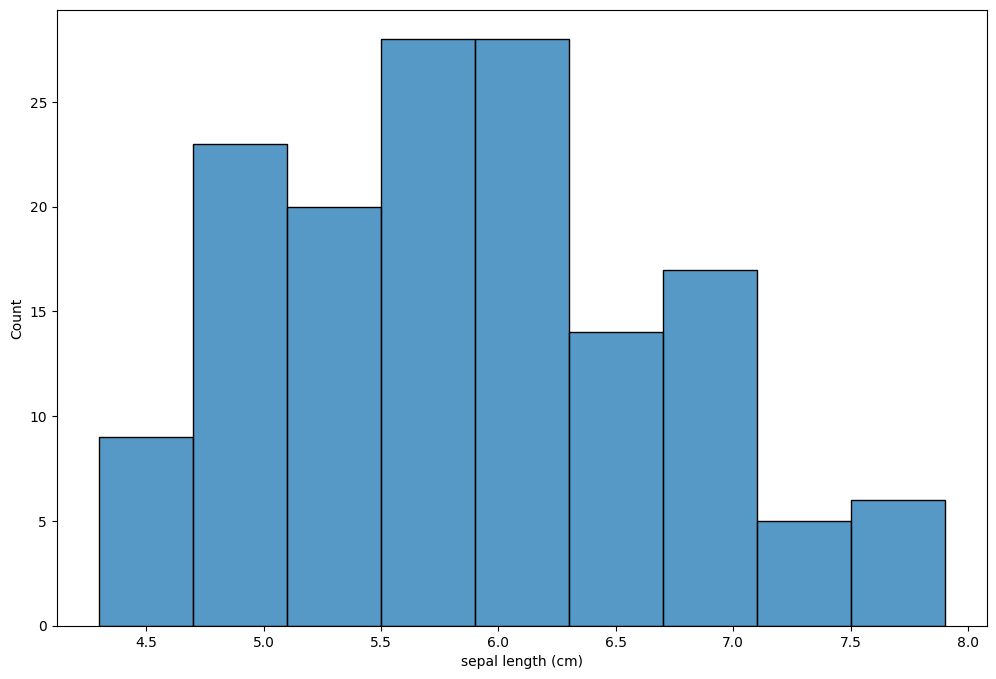

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data['sepal length (cm)'])


# Show the plot
plt.show()

Histograms are a basic type of plots used to study the distribution of any data in one dimension. It divides the data values into bins and shows the frequency/ count of each bin.

From the above histogram, we can gather the following about the sepal length feature:


1.   Distribution Shape - The shape of the histogram will show whether the data is normally distributed, skewed, or has multiple peaks.
2.   Central Tendency (Mean/Median) - The peak of the histogram indicates the most common range of sepal lengths. If the histogram is symmetric, the mean and median are close to this peak.
3.   Spread and Range - You can observe the spread of the data (how wide the distribution is) and identify the minimum and maximum values. This shows the variability in sepal lengths
4.   Outliers - Look for bars that are distant from the main bulk of the data. These represent outliers, which could be significant in identifying unusual samples.





Let's look at some more ways to visualise and learn more about data, in higher dimensions.

**1. Boxplots:** Useful for picturing the distribution, central tendency and variability of the data

Box Plot for comparing all the features:

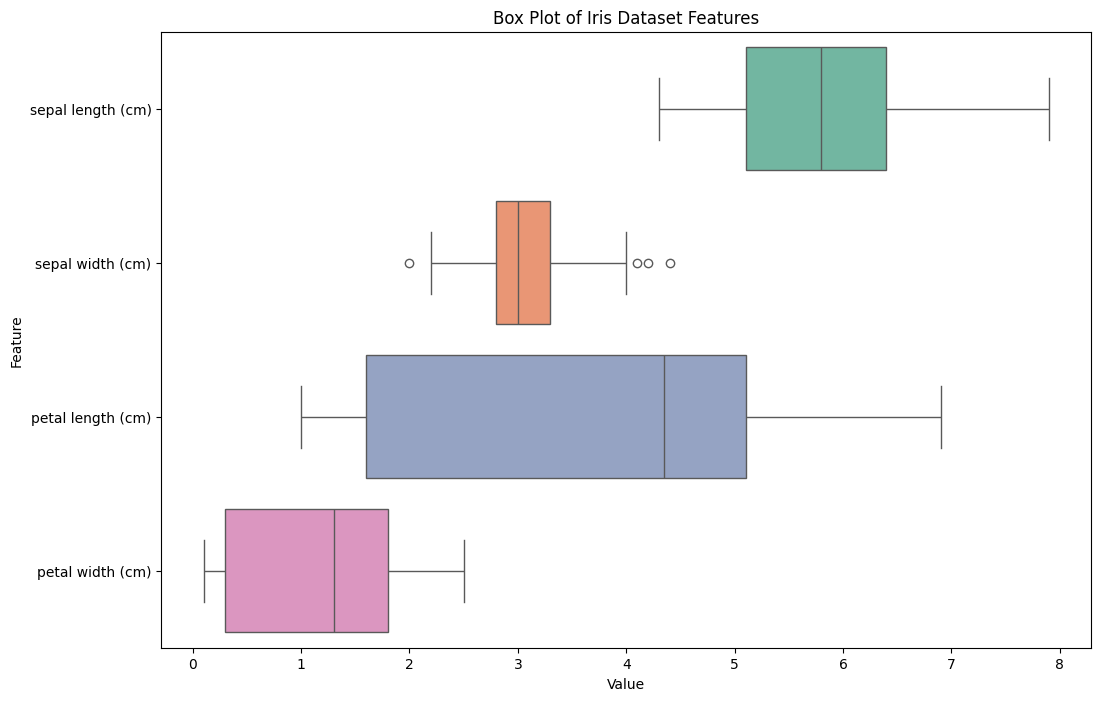

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(['target'],axis=1), orient='h', palette='Set2')

# Set labels
plt.title('Box Plot of Iris Dataset Features')
plt.xlabel('Value')
plt.ylabel('Feature')

# Show the plot
plt.show()

Box Plot for comparing species wrt one feature:

In [7]:
data['species'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

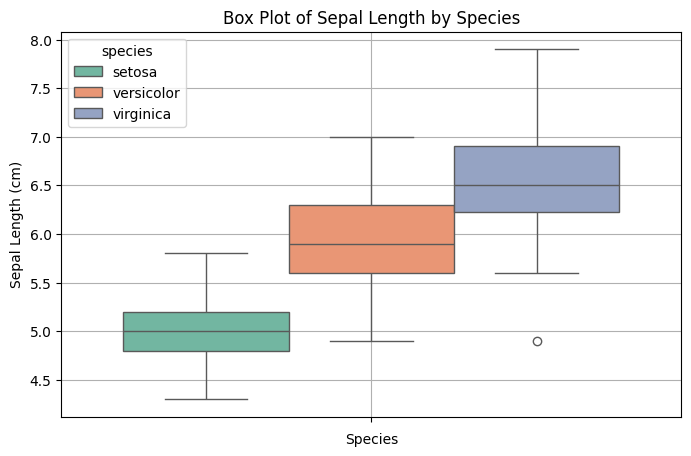

In [11]:


# Plotting the box plot for sepal length
plt.figure(figsize=(8, 5))
sns.boxplot(hue='species', y='sepal length (cm)', data=data, palette='Set2')
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True)
plt.show()

The box plot provides a quick snapshot of variability and potential skewness within each group.

We get inferences on the distribution of the data, which is not very clear from a histogram like:
1.  Median and quartile ranges - The line inside each box represents the median (50th percentile). The box itself shows the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3). This provides an insight into the central tendency and spread
2. Variability and spread - The width of the box (IQR) shows how variable the data is within features, and among species
3. Symmetry and skewness - If the median line is not centered within the box, or if the whiskers are of unequal lengths, the data might be skewed.
4. Presence of Outliers - Points outside the whiskers (extending lines) are considered outliers. These are values that are significantly different from the rest of the data.


**2 (a). Scatter Plots (2D):** These plots are used to represent the relationship between two numeric variables, and help visualise correlation (if any)

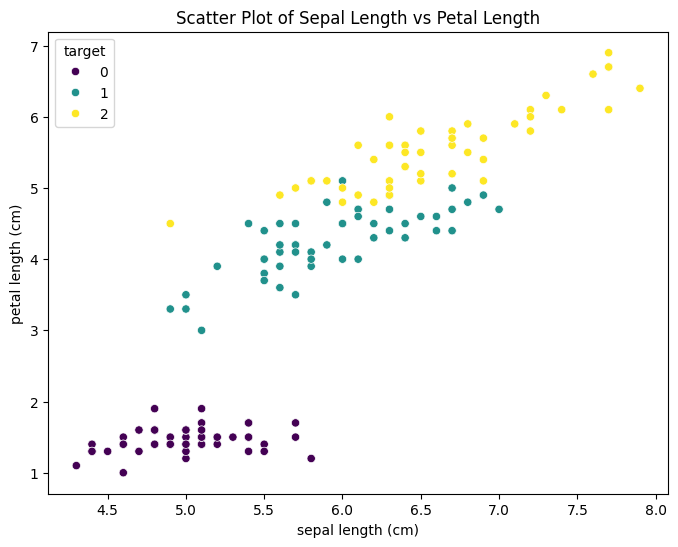

In [12]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal length (cm)', y='petal length (cm)', hue='target', palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.show()

We can see from above figure that scatter plots are very useful to able to distinguish different groups of data, and are a good primary step in visualisation and pre-processing. The scatter plot can show natural groupings of the data points that hint at species differences or the presence of subgroups within a species.

The 'hue' parameter, allows us to color the sepal length vs petal length data points according to the different catergories they belong to in the 'target' column.By adding a hue for species, you can see how each species occupies different regions in the plot.

Scatter plots can also reveal individual data points that fall outside the general pattern, highlighting potential outliers or anomalies in the data

But, if we are working with real data, we might not know the exact combination of features to plot to be able to visualise the different 'groups' of a data using scatter plots.

If the number of features are not too large, we can visualise the scatter plots for all combination of features using the pair plot feature!

<Figure size 1600x1200 with 0 Axes>

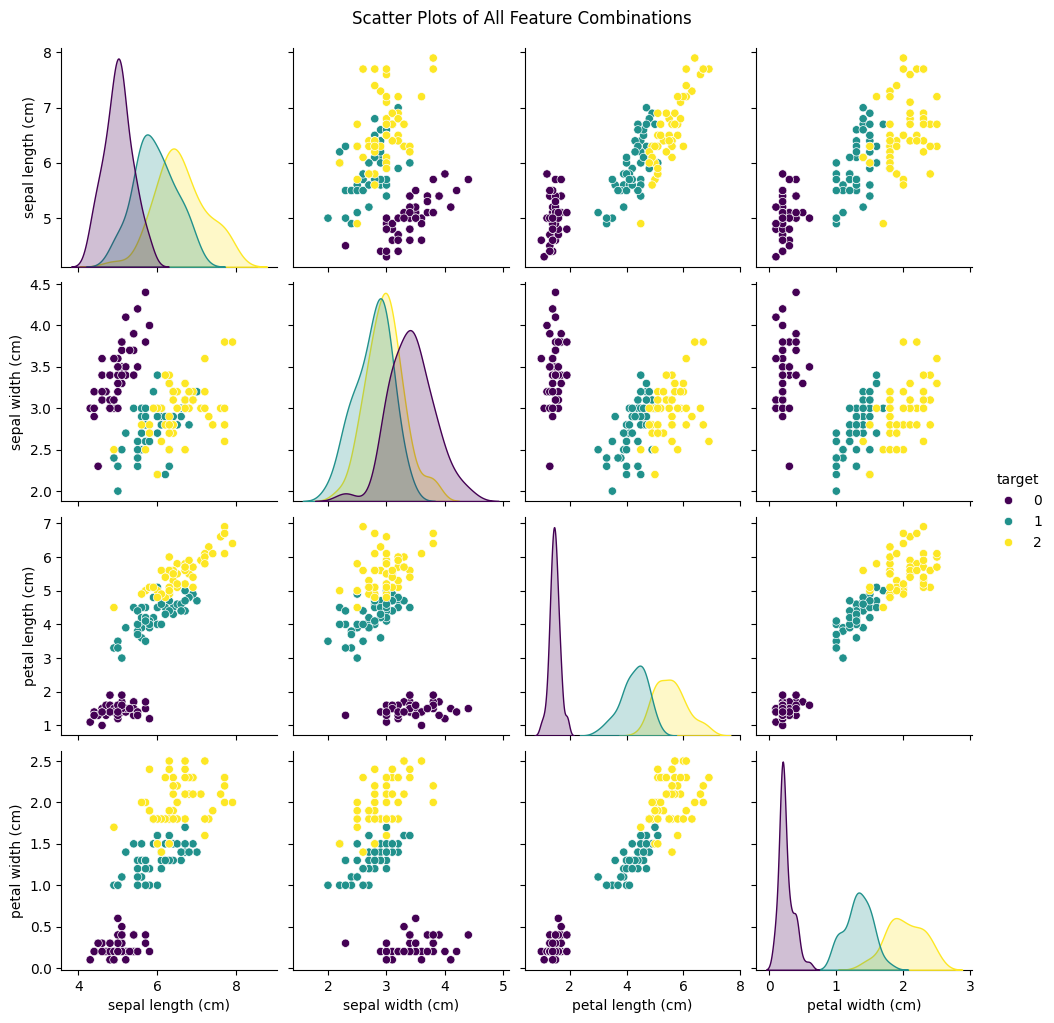

In [ ]:
# Create pair plots to visualise the scatter plots for all combinations of features
plt.figure(figsize=(16, 12))
sns.pairplot(data, hue='target', palette='viridis')
plt.suptitle('Scatter Plots of All Feature Combinations', y=1.02)
plt.show()

The above result helps us to zero-in on which features when scattered give a clear distinction between the 'groups' in the data.

1. Multi-Variable Relationships: Pair plots show scatter plots for all feature combinations (sepal length, sepal width, petal length, and petal width) along with histograms on the diagonal. This provides a comprehensive view of relationships between pairs of variables.

2. Species Differentiation: Pair plots effectively highlight how species separate across multiple dimensions.

3. Correlations: The scatter plots in the pair plot help identify which features are strongly correlated.

4. Identifying Misclassifications: Overlapping points between species suggest areas where misclassification might occur in a predictive model.

**2. (b) 3 D Scatter Plot:** For visualising relation between three variables.

Plots created using plotly are interactive and we can use it to better understand the distribution.

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(data, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='species', title='3D Scatter Plot of Iris Dataset')

# Show the plot
fig.show()

Plots using Matplotlib Tools, uses starightforward code to display a 3D scatter plot.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

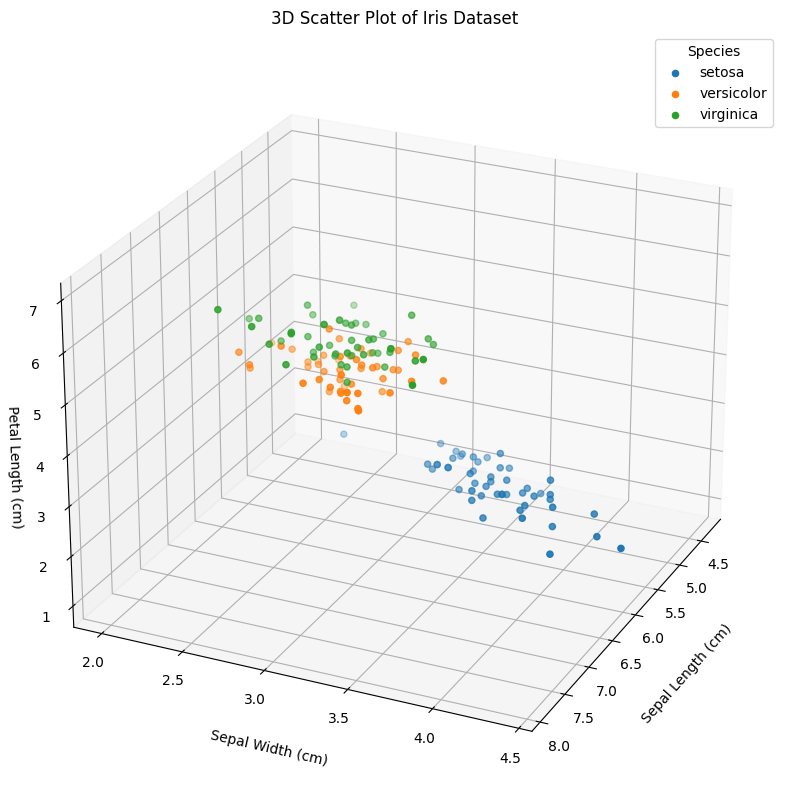

In [ ]:
# Extract features for the 3D scatter plot
x = data['sepal length (cm)']
y = data['sepal width (cm)']
z = data['petal length (cm)']
species = data['species']


# Create a 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for specie in data['species'].unique():
    subset = data[data['species'] == specie]
    ax.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], subset['petal length (cm)'],
               label=specie)


# Set plot labels
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.set_xlabel('Sepal Length (cm)',labelpad=15)
ax.set_ylabel('Sepal Width (cm)',labelpad=15)
ax.set_zlabel('Petal Length (cm)',labelpad=1)


# Adjust viewing angle
ax.view_init(elev=25, azim=25)

# Add a legend
ax.legend(title='Species')

# Show the plot
plt.show()

How do 3d scatter plots help us:

1. Complex Patterns: Visualize complex patterns and relationships that can't be fully captured in simpler plots.
2. Insight into Data Structure: Offers a more holistic view of how sepal and petal measurements combine to define each species.
3. Enhanced Species Differentiation: 3D plots help distinguish species better than 2D scatter plots by adding another dimension of information.

**3. Parallel Coordinate Plots:** Especially suitable for multi-dimensional data, and to see how features vary across classes. Here, each line is a sample, traversing across multiple classes/features.

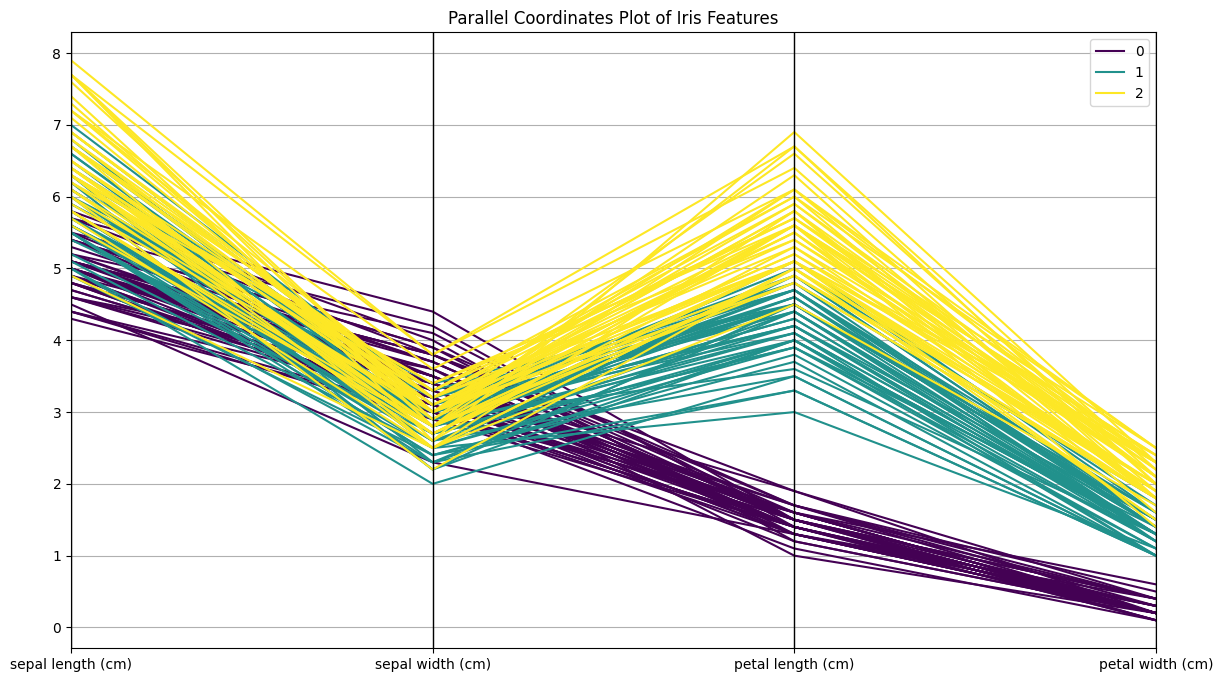

In [ ]:
from pandas.plotting import parallel_coordinates

# Parallel coordinates plot
plt.figure(figsize=(14, 8))
parallel_coordinates(data.drop('species',axis=1), class_column='target', colormap='viridis')
#plt.xticks(rotation=90)
plt.title('Parallel Coordinates Plot of Iris Features')
plt.show()

From the above chart, we can get below conclusions:

1. Multi-Feature Species Separation:Parallel coordinate plots allow you to see how each species behaves across multiple features simultaneously.
2. Patterns and Correlations:Parallel coordinate plots highlight relationships between features; for example, a consistent pattern where a higher petal length correlates with a larger sepal length can be visually identified across the lines.
3. Feature Contribution to Species Classification:Features that show clear separation between species (e.g., petal length) are easy to spot, helping you identify which features are most important for distinguishing the classes.

**4. Heatmaps:** Visualization tool to find features which have a strong correlation between them

Let's look at another dataset - the 'flights' dataset (loaded from seaborn).
The dataset records the number of passengers (in thousands) flying each month from January 1949 to December 1960.

In [13]:
flights = sns.load_dataset('flights')

# Display the first few rows
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Pivoting the data: We're rearranging the data so the columns are the years, the months are the rows, and the 'data' is the number of passangers flying corresponding to a particular month and year.

In [14]:
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
flights_pivot.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


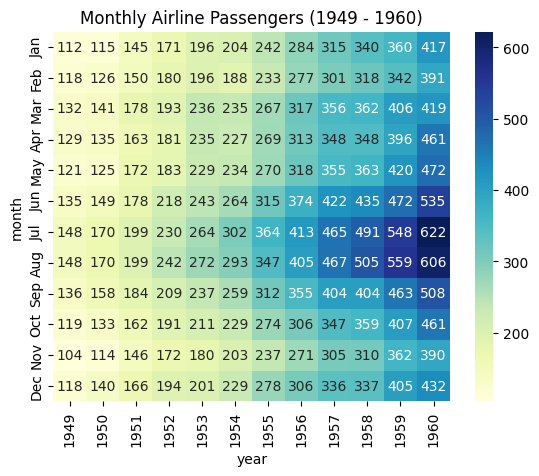

In [15]:

# Plotting the heatmap
sns.heatmap(flights_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Monthly Airline Passengers (1949 - 1960)")
plt.show()

Interpreting the heat map:

1. Seasonal Patterns: The heatmap clearly shows seasonal trends, with higher passenger counts during the summer months (June to August) and lower counts during the winter months (January to March). This seasonal pattern is consistent across all years.

2. Increasing Trend Over Time: There is a noticeable increase in the intensity of the heatmap colors as you move from earlier to later years (left to right), indicating a steady rise in the number of passengers over time. This reflects the growing popularity of air travel in the post-war era.

3. Anomalies and Deviations: Any sudden deviations or dips in the pattern, such as lighter colors in typically high months, might suggest anomalies (e.g., economic downturns, specific events impacting travel).
